In [9]:
import torch
import os.path as osp
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import import_ipynb

from model import resnet18
from config import checkpoint_folder, label_list
from dataset import create_datasets

In [10]:
def demo(img_path):
    totensor = transforms.ToTensor()
    # 輸入前調整size
    img = Image.open(img_path).resize((32, 32))
    # 增加一個維度，以適應(N,C,H,W)
    img_tensor = totensor(img).unsqueeze(0)
    net = resnet18()
    # load model
    net.load_state_dict(torch.load(osp.join(checkpoint_folder, "cls.pth")))
    # eval mode
    net.eval()
    output = net(img_tensor)
    # predict
    label = torch.argmax(output, dim=1)
    plt.imshow(np.array(img))
    plt.title(str(label_list[label]))
    plt.show()

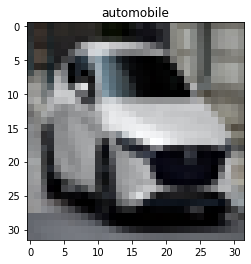

In [15]:
if __name__ == "__main__":
    demo("./img/car.jpg")